# The project.

Suicide is a topic of intest to me as it has touched very close to home and seems to be getting worse in some countries in the world, including the US. I'm curious to examine the global trends in this topic to get a more complete image of what the reality of this drama is. I will approach the analysis from 3 perpectives: global trend, last 5 years. USA by sex and generation, las 20 years, and then comparison of 2 countries</font>

## The dataset: 

"Suicide Rates Overview 1985 to 2016" by the World Bank aggregates socio-economic info with suicide rates for most countries in the world. It contains suicides counts by year, age, sex and country for over a hundred countries globally. The entire dataset will not be examined as it lacks info which absence generates biases about global trends (i,e, China and India are missing from the dataset).

The dataset's shape is 27.8k X 11 after the column for Human Development Index 'HDI for year' dropped for simplicity.

Variables:

__Country__: Categorical / Nominal<br>
__Year__: Categorical / Ordinal<br>
__Sex__: Categorical / Nominal<br>
__Suicide_no__: Absolute number of suicide cases. Quantitative / discrete<br>
__Population__: Total number of individuals within a population<br>
__gdp_for_year__: Total gdp for the country for the year. Common to all rows for the country in that year.<br>
__gdp_per_capita__: National gdp divided by population. Common to all rows for the country in that year.<br>
__generation__: 
1. G I Generation (the Greatest Generation: lived through the great depression and WWII):Born on or before 1924
2.  Silent: Born between 1925 and 1945
3.  Baby Boomers: Born between 1946 and 1964
4.  X: Born between 1965 and 1980
 

For sake of simplicity I have averaged the suicide rate in years 2011 and 2015 to generate charts on those years.

### The exploration: ###

I'm interested to answer a few questions based on this dataset:

__-What are the 20 countries with the highest suicide rate in the last 5 years for which there is data available?__ <br> Only years 2011 - 2015 will be taken into account and population and suicides number will be used to generate a new variable with overall numbers. The purpose of this question is to work across years. 

__-What is the trend in suicide rates in the United States in the last 20 years? The dataframe will be used to extract info for USA only and the following questions: What is the male/female ratio of suicide in USA? How has the overall number evolved over time? What is the generational breakdown of such cases?__ The purpose of this exercise is to focus on just one place and extract the most out of it. 

__-What are the differences and similarities between suicide rates in Colombia and Mexico?__ Colombia being my native country and Mexico being very close to my heart interest me the most. The purpose of this is to have a direct comparison.

In [89]:
#importing necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline


In [90]:
#examining the dataset and dropping unnecesary columns
df = pd.read_csv('/Users/carandu/thinkful_projects/capstone_1/master.csv')
df = df.drop('HDI for year',1)
#Let's examine the new dataframe
df.shape

(27820, 11)

In [91]:
#Question # 1: What are the 10 countries with the highest suicide rate in the last 5 years? Let's make a subset of the years 2011 - 2015
df_five_years = df[(df['year'] >= 2011) & (df['year'] < 2016)]
df_five_years.shape

(4644, 11)

In [92]:
#Group by country, aggregate by suicide number and population and find a combined natl average
df_five_years = df.groupby(['country']).agg({'suicides_no':sum, 'population':sum})
df_five_years['natl_average'] = df_five_years['suicides_no'] /  df_five_years['population'] * 100000
df_five_years = df_five_years.sort_values(by='natl_average', ascending = False)
df_five_years.head(10)

,suicides_no,population,natl_average
country,,,
Lithuania,28039,68085210,41.182219
Russian Federation,1209742,3690802620,32.777207
Sri Lanka,55641,182525626,30.483939
Belarus,59892,197372292,30.344685
Hungary,73891,248644256,29.717558
Latvia,12770,44852640,28.471011
Kazakhstan,101546,377513869,26.898614
Slovenia,10615,40268619,26.360477
Estonia,7034,27090810,25.964525


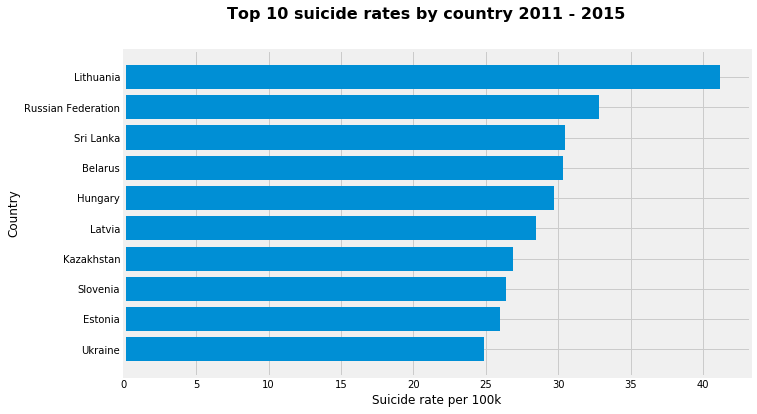

In [93]:
#Plot of those 10 countries in a horizontal bar chart

x = df_five_years.index[:10]
y = df_five_years['natl_average'][:10]
fig = plt.figure(figsize=(10, 6))
plt.ylabel('Country', fontsize = 12)
plt.xlabel('Suicide rate per 100k', fontsize = 12)
fig.suptitle('Top 10 suicide rates by country 2011 - 2015', fontsize=16, fontweight='bold')
plt.barh(x, y)
plt.gca().invert_yaxis() #This line inverts the order and places the country with the highest rate on top.
plt.show()


Lithuania tops the list with a suicide rate of 41.18 per 100k, 26% larger than the second country in the chart, the Russian Federation. This and other sources corroborate the fact that suicide in Luthuania is indeed a public health problem. Also interesting to see that 6 other countries with the higuest suicide rate are neighbors with Luthiania and it is worth asking the question if geographical and socioeconomic conditions influence this problem on a regional level. There's only one country from South Asia in the top 10 (Sri Lanka).

In [111]:
#Let's examine the story of the top country in the list more closely by filtering Lithuania for just 5 years:
lithuania = df[(df['country'].isin(['Lithuania']))&(df['year'] >= 2011) & (df['year'] < 2016)]
lithuania_year = lithuania.groupby(['year']).agg({'suicides_no':sum, 'population':sum})
lithuania_year['rate'] = lithuania_year['suicides_no'] / lithuania_year['population'] * 100000


<Figure size 864x432 with 0 Axes>

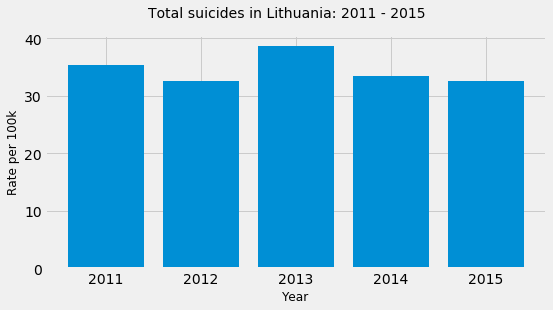

In [127]:
x = lithuania_year.index
y = lithuania_year['rate']
fig = plt.figure(figsize=(12, 6))
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(8,4))
plt.bar(x, y, label='lithuania')
plt.ylabel('Rate per 100k', fontsize = 12)
plt.xlabel('Year', fontsize = 12)
plt.suptitle('Total suicides in Lithuania: 2011 - 2015', fontsize = 14)
plt.show()

In [116]:
lithuania_gen = lithuania.groupby(['year','generation']).agg({'suicides_no':sum, 'population':sum}).unstack(level=-1)
lithuania_gen.head()

suicides_no                                             population  \
generation     Boomers Generation X Generation Z Millenials Silent    Boomers   
year                                                                            
2011               281          416            2        225     94     641320   
2012               240          395            3        199     90     641735   
2013               264          457            5        256    103     645931   
2014               251          352            5        205    117     652746   
2015               271          321            5        194    105     660668   

                                                         
generation Generation X Generation Z Millenials  Silent  
year                                                     
2011             880957       300930     802744  253854  
2012             864926       290316     781203  259590  
2013             847331       282271     766873  264221  
2014             828253       276985     755393  268200  
2015             807096       273621     741511  271030

generation    Boomers  Generation X  Generation Z  Millenials     Silent
year                                                                    
2011        43.815880     47.221374      0.664606   28.028861  37.029158
2012        37.398615     45.668647      1.033357   25.473532  34.670057
2013        40.871239     53.934059      1.771347   33.382320  38.982518
2014        38.452936     42.499091      1.805152   27.138192  43.624161
2015        41.019090     39.772220      1.827345   26.162795  38.741099


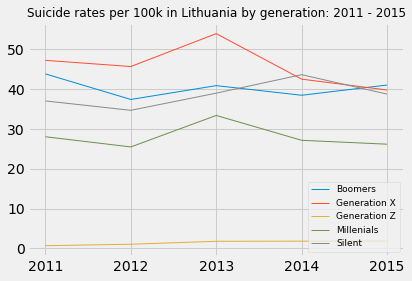

In [128]:
x = lithuania_gen.index
y = (lithuania_gen['suicides_no'] / lithuania_gen['population'])*100000
plt.plot(x, y['Boomers'], linewidth=1.0)
plt.plot(x, y['Generation X'], linewidth=1.0)
plt.plot(x, y['Generation Z'], linewidth=1.0)
plt.plot(x, y['Millenials'], linewidth=1.0)
plt.plot(x, y['Silent'], linewidth=1.0)
plt.legend(loc='lower right', frameon=True, fontsize=9)
plt.title('Suicide rates per 100k in Lithuania by generation: 2011 - 2015', fontsize = 12)
plt.plot(figsize=(10,16))
print(y)



In [78]:
lit_usa = df[(df['country'].isin(['United States', 'Lithuania']))&(df['year'] >= 2011) & (df['year'] < 2016)]
lit_usa_year = lit_usa.groupby(['country', 'year']).agg({'suicides_no':sum, 'population':sum})
lit_usa_year['rate per 100k'] = lit_usa_year['suicides_no'] / lit_usa_year['population'] *100000
lit_usa_year

suicides_no  population  rate per 100k
country       year                                        
Lithuania     2011         1018     2879805      35.349616
              2012          927     2837770      32.666495
              2013         1085     2806627      38.658504
              2014          930     2781577      33.434271
              2015          896     2753926      32.535370
United States 2011        39508   290313825      13.608722
              2012        40596   292827128      13.863470
              2013        41143   295322862      13.931532
              2014        42769   297749735      14.364077
              2015        44189   300078511      14.725813

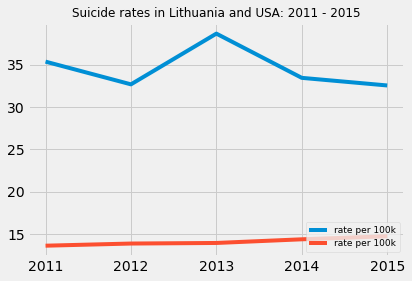

In [118]:
#get_level_values() function enables you to get the index by name from a multiindex dataframe.

plt.plot(lit_usa_year.iloc[lit_usa_year.index.get_level_values('country') == 'Lithuania', :].index.get_level_values(
    'year'), lit_usa_year.iloc[lit_usa_year.index.get_level_values('country') == 'Lithuania', :]["rate per 100k"])

plt.plot(lit_usa_year.iloc[lit_usa_year.index.get_level_values('country') == 'United States', :].index.get_level_values(
    'year'), lit_usa_year.iloc[lit_usa_year.index.get_level_values('country') == 'United States', :]["rate per 100k"])

plt.legend(loc='lower right', frameon=True, fontsize=9)
plt.title('Suicide rates in Lithuania and USA: 2011 - 2015', fontsize = 12)
plt.plot(figsize=(10,16))
plt.show()

In [119]:
#let's compare Lithuania with the USA
lit_usa_country = lit_usa.groupby(['year', 'country','generation']).agg({'suicides_no':sum, 'population':sum})
lit_usa_country['per 100k'] = lit_usa_country['suicides_no'] /  lit_usa_country['population'] * 100000
#lithuania_usa_gen = lithuania_usa.groupby(['year','generation']).agg({'suicides_no':sum, 'population':sum})
lit_usa_country.head(20)

suicides_no  population   per 100k
year country       generation                                      
2011 Lithuania     Boomers               281      641320  43.815880
                   Generation X          416      880957  47.221374
                   Generation Z            2      300930   0.664606
                   Millenials            225      802744  28.028861
                   Silent                 94      253854  37.029158
     United States Boomers              9700    59825053  16.213943
                   Generation X        15457    85051429  18.173710
                   Generation Z          287    41436606   0.692624
                   Millenials          10922    85280972  12.807077
                   Silent               3142    18719765  16.784399
2012 Lithuania     Boomers               240      641735  37.398615
                   Generation X          395      864926  45.668647
                   Generation Z            3      290316   1.033357
                   Millenials            199      781203  25.473532
                   Silent                 90      259590  34.670057
     United States Boomers             10296    61717986  16.682333
                   Generation X        15620    84564721  18.471060
                   Generation Z          311    41472067   0.749902
                   Millenials          11088    86063135  12.883565
                   Silent               3281    19009219  17.260046

In [120]:
#lit_usa_country.loc[[2011], ['Boomers']]
#lit_usa_country.query("year == '2014' and generation == 'Boomers'")
usa_boomers = lit_usa_country.query("country == 'United States' and generation == 'Boomers'")
lit_boomers = lit_usa_country.query("country == 'Lithuania' and generation == 'Boomers'")
lit_boomers.reset_index
lit_boomers

,,,suicides_no,population,per 100k
year,country,generation,,,
2011,Lithuania,Boomers,281,641320,43.815880
2012,Lithuania,Boomers,240,641735,37.398615
2013,Lithuania,Boomers,264,645931,40.871239
2014,Lithuania,Boomers,251,652746,38.452936
2015,Lithuania,Boomers,271,660668,41.019090


In [121]:
df_usa = df[df.country == 'United States'] #filtering!!!
usa_by_year = df_usa.groupby(['year']).agg({'suicides_no':sum, 'population':sum})
usa_by_year['natl_average'] = usa_by_year['suicides_no'] / usa_by_year['population']*100000
usa_by_gender = df_usa.groupby('sex').agg({'suicides_no':sum , 'population': sum}) #grouping or aggregation!
plt.figure(figsize=(14, 6))
usa_by_year.head(31)

,suicides_no,population,natl_average
year,,,
1985,29446,220723000,13.340703
1986,30892,222953000,13.855835
1987,30783,225148000,13.672340
1988,30388,227353000,13.365999
1989,30218,229487000,13.167630
1990,30895,229952200,13.435401
1991,30790,232955000,13.217145
1992,30471,235565600,12.935250
1993,31084,238092300,13.055441


<Figure size 1008x432 with 0 Axes>

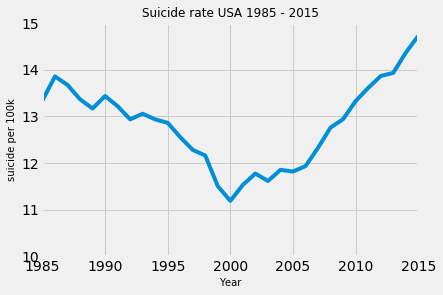

In [122]:
x = usa_by_year.index
y = usa_by_year['natl_average']
plt.title("Suicide rate USA 1985 - 2015", fontsize = 12)
plt.ylabel('suicide per 100k', fontsize = 10)
plt.xlabel('Year', fontsize = 10)
plt.axis([1985, 2015, 10, 15])
plt.plot(x, y)
plt.show()


by gender in the us

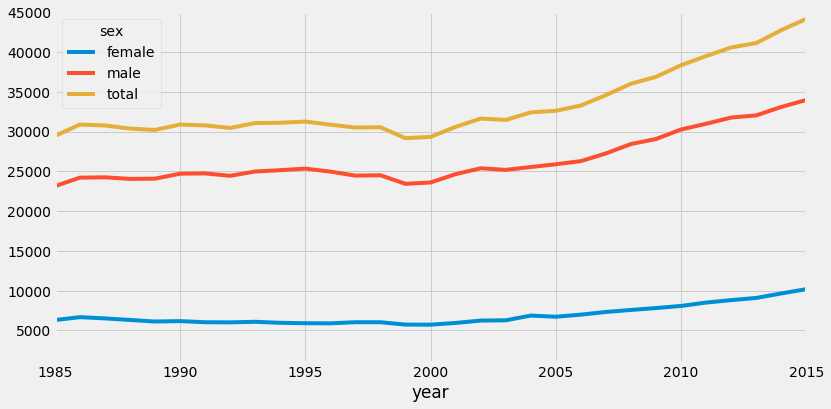

In [106]:
#make a barplot with male and female next to each other for every year
#plt.bar(usa_by_year['suicides_no'], usa_by_year['population'], label='By sex')
usa_by_year = df_usa.groupby(['year','sex','generation']).agg({'suicides_no':sum, 'population':sum})

fig, ax = plt.subplots(figsize=(12,6))
plt.axis([1985, 2015, 1000, 45000])
q = usa_by_year.groupby(['year','sex']).sum()['suicides_no'].unstack()
q['total'] = q['male'] + q['female']
plt.style.use('fivethirtyeight')
q.plot(ax=ax)
plt.show()

In [132]:
#creating new dataframes for Mexico and Colombia
col = df[df.country == 'Colombia']
mex = df[df.country == 'Mexico']
col = df.loc[df['country'] == 'Colombia']
mex = df.loc[df['country'] == 'Mexico']
col.head(100)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
5636,Colombia,1985,male,75+ years,21,123400,17.02,Colombia1985,"34,894,411,352",1393,G.I. Generation
5637,Colombia,1985,male,55-74 years,113,1015200,11.13,Colombia1985,"34,894,411,352",1393,G.I. Generation
5638,Colombia,1985,male,25-34 years,193,2323700,8.31,Colombia1985,"34,894,411,352",1393,Boomers
5639,Colombia,1985,male,15-24 years,256,3190200,8.02,Colombia1985,"34,894,411,352",1393,Generation X
5640,Colombia,1985,male,35-54 years,188,2451100,7.67,Colombia1985,"34,894,411,352",1393,Silent
5641,Colombia,1985,female,15-24 years,117,3140700,3.73,Colombia1985,"34,894,411,352",1393,Generation X
5642,Colombia,1985,female,25-34 years,45,2276100,1.98,Colombia1985,"34,894,411,352",1393,Boomers
5643,Colombia,1985,female,75+ years,3,174000,1.72,Colombia1985,"34,894,411,352",1393,G.I. Generation
5644,Colombia,1985,female,35-54 years,31,2403500,1.29,Colombia1985,"34,894,411,352",1393,Silent
5645,Colombia,1985,female,55-74 years,12,1150600,1.04,Colombia1985,"34,894,411,352",1393,G.I. Generation


In [146]:
col = col.groupby(['year']).agg({'suicides_no':sum})
col

,suicides_no
year,
1985,1001
1986,958
1987,951
1988,912
1989,831
1990,865
1991,1010
1992,1086
1993,1085


In [108]:
new_col = col.groupby(['year','sex']).agg({'suicides_no':sum, 'population':sum}) ## best practice->groupby LIST!!!!
new_mex = mex.groupby(['year','sex']).agg({'suicides_no':sum, 'population':sum})
new_col['natl_average'] = new_col['suicides_no'] /  new_col['population'] * 100000
new_mex['natl_average'] = new_mex['suicides_no'] /  new_mex['population'] * 100000
new_mex.head(62)

suicides_no  population  natl_average
year sex                                          
1985 female          265    33840000      0.783097
     male           1279    33726000      3.792326
1986 female          269    34619300      0.777023
     male           1445    34504200      4.187896
1987 female          285    34088100      0.836069
     male           1416    33860000      4.181926
1988 female          280    34952000      0.801099
     male           1423    34694000      4.101574
1989 female          285    35825000      0.795534
     male           1580    35534000      4.446446
1990 female          278    36700900      0.757475
     male           1648    36376000      4.530460
1991 female          314    37578000      0.835595
     male           1789    37218300      4.806775
1992 female          338    38081100      0.887579
     male           1899    37204700      5.104194
1993 female          331    38875500      0.851436
     male           2011    37951300      5.298896
1994 female          393    39672900      0.990601
     male           2195    38701200      5.671659
1995 female          443    40473300      1.094549
     male           2434    39453800      6.169241
1996 female          494    42339570      1.166757
     male           2514    41462724      6.063277
1997 female          539    43109043      1.250318
     male           2811    42231837      6.656116
1998 female          510    43846755      1.163142
     male           2802    42978923      6.519475
1999 female          508    44564365      1.139924
     male           2819    43707612      6.449677
...                  ...         ...           ...
2001 female          672    45948892      1.462494
     male           3088    45103822      6.846426
2002 female          656    46621484      1.407077
     male           3170    45772832      6.925506
2003 female          694    47308985      1.466952
     male           3376    46449874      7.268050
2004 female          675    48030275      1.405364
     male           3381    47162793      7.168787
2005 female          730    48798775      1.495939
     male           3544    47931233      7.393926
2006 female          709    49677364      1.427209
     male           3521    48791475      7.216425
2007 female          762    50584998      1.506375
     male           3523    49709299      7.087205
2008 female          860    51508653      1.669622
     male           3782    50661934      7.465171
2009 female          966    52430411      1.842442
     male           4057    51613931      7.860281
2010 female          900    53336733      1.687392
     male           3958    52539128      7.533433
2011 female         1071    54210107      1.975646
     male           4487    53444993      8.395548
2012 female         1051    55063134      1.908718
     male           4330    54305631      7.973390
2013 female         1043    55902257      1.865757
     male           4668    55134451      8.466576
2014 female         1228    56736919      2.164376
     male           4950    55955670      8.846288
2015 female         1248    57572745      2.167692
     male           4986    56785139      8.780466

[62 rows x 3 columns]

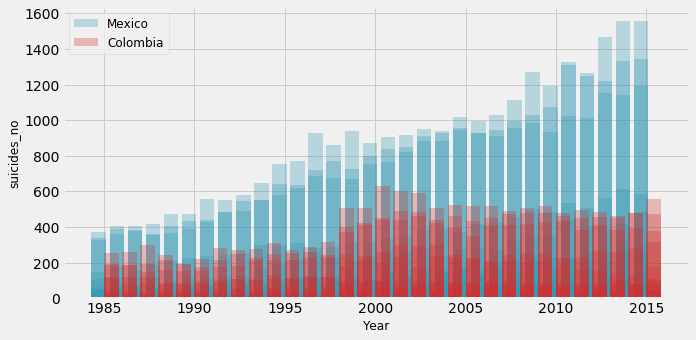

In [124]:
#y_pos = np.arange(len(col['year']))

fig, ax = plt.subplots(figsize=(10,5))
#pos = list(range(len(col['year'])))
width = [0.1,0.2,3,1.5,0.3]
plt.bar(mex['year'] - 0.3, mex['suicides_no'], label='Mexico', color=(0.2, 0.6, 0.7, 0.3))
plt.bar(col['year']+ 0.4, col['suicides_no'], label='Colombia', color=(0.8, 0.2, 0.2, 0.3))

plt.ylabel('suicides_no', fontsize = 12)
plt.xlabel('Year', fontsize = 12)
plt.style.use('fivethirtyeight')
plt.legend(loc='best',frameon=True, prop={'size': 12})
plt.show()

In [129]:
#df.groupby(['country', 'sex'])['suicides_no'].sum()